# Boargames Data Analysis
In this notebook, we are going to use the dataframe obtained from the Boardgames Scraping class. After some exploratora analysis, we will clean and tranform the data by taking into account the:
- Missing values
- Data types within the different columns
- Categorical data
- Duplicated data

In addition, we will provide with some data visualization to better understand its trend. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math 

%matplotlib inline


# import data
df = pd.read_csv('Boardgame/data/boardgame_data.csv')
del df['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,Board Game Rank,Title,Year,Description,Geek Rating,Avg Rating,Num Voters,Num Players Min,Num Players Max,Best Num Players Min,Best Num Players Max,Playtime Min,Playtime Max,Player Min Age,Language Dependence,Weight,Category,Designer
0,1,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.552,8.79,43254,1.0,4.0,3.0,3.0,60.0,120.0,14.0,Extensive use of text - massive conversion nee...,3.863102,Thematic | Strategy,Isaac Childres
1,2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.461,8.61,42367,2.0,4.0,4.0,4.0,60.0,60.0,13.0,Extensive use of text - massive conversion nee...,2.839793,Thematic | Strategy,Rob Daviau
2,3,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.391,8.67,20391,2.0,4.0,3.0,4.0,60.0,120.0,14.0,No necessary in-game text,3.910296,Strategy,Gavan Brown
3,4,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.285,8.43,66708,1.0,5.0,3.0,3.0,120.0,120.0,12.0,Moderate in-game text - needs crib sheet or pa...,3.241912,Strategy,Jacob Fryxelius
4,5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.254,8.69,13930,3.0,6.0,6.0,6.0,240.0,480.0,14.0,Extensive use of text - massive conversion nee...,4.225806,Thematic | Strategy,Dane Beltrami


## <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

The boardgames dataset contains the following columns:
 - [0]   Board Game Rank: rank of the game acting as ID
 - [1]   Title
 - [2]   Year: year when the game was released (it can contain string showing the game edition)
 - [3]   Description
 - [4]   Geek Rating: "Bayesian averaging"
 - [5]   Avg Rating: average of all the ratings from registered BGG users
 - [6]   Num Voters: total number of users given rating to the game
 - [7]   Num Players Min
 - [8]   Num Players Max
 - [9]   Best Num Players Min
 - [10]  Best Num Players Max
 - [11]  Playtime Min: minimum allowed playing time
 - [12]  Playtime Max: maximum allowed playing time
 - [13]  Player Min Age
 - [14]  Language Dependence: string showing the dependence of the game to
 - [15]  Weight: Average complexity of this game
 - [16]  Category
 - [17]  Designer

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Board Game Rank       4900 non-null   int64  
 1   Title                 4900 non-null   object 
 2   Year                  4891 non-null   object 
 3   Description           3360 non-null   object 
 4   Geek Rating           4900 non-null   float64
 5   Avg Rating            4900 non-null   float64
 6   Num Voters            4900 non-null   int64  
 7   Num Players Min       4899 non-null   float64
 8   Num Players Max       4899 non-null   float64
 9   Best Num Players Min  4580 non-null   float64
 10  Best Num Players Max  4557 non-null   float64
 11  Playtime Min          4899 non-null   float64
 12  Playtime Max          4899 non-null   float64
 13  Player Min Age        4899 non-null   float64
 14  Language Dependence   4900 non-null   object 
 15  Weight               

In [3]:
df.describe()

,Board Game Rank,Geek Rating,Avg Rating,Num Voters,Num Players Min,Num Players Max,Best Num Players Min,Best Num Players Max,Playtime Min,Playtime Max,Player Min Age,Weight
count,4900.00000,4900.000000,4900.000000,4900.000000,4899.000000,4899.000000,4580.000000,4557.000000,4899.000000,4899.000000,4899.000000,4900.000000
mean,2450.50000,6.171708,7.089906,3046.353265,1.935497,5.271892,3.229039,3.468071,70.323535,112.685650,10.758114,2.361396
std,1414.65249,0.483325,0.553915,6747.121678,0.697311,7.879397,1.289562,1.535260,159.989456,465.923445,2.902751,0.795796
min,1.00000,5.696000,5.810000,136.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1225.75000,5.802000,6.670000,524.000000,2.000000,4.000000,2.000000,2.000000,30.000000,30.000000,9.000000,1.785714
50%,2450.50000,6.000000,7.040000,1044.000000,2.000000,4.000000,3.000000,4.000000,45.000000,60.000000,12.000000,2.292893
75%,3675.25000,6.393000,7.460000,2496.000000,2.000000,6.000000,4.000000,4.000000,60.000000,100.000000,13.000000,2.893068
max,4900.00000,8.552000,8.990000,103666.000000,8.000000,100.000000,12.000000,31.000000,5400.000000,22500.000000,18.000000,4.844660


## <a class="anchor" id="Clean-Data">Part II : Clean data</a>
- put the language dependence col as a (needed, semi needed, not needed) -> put it as dummy
- get the type of planes (mysterious, cards...) -> put it as dummy
- check for nan's

### <a class="anchor" id="Null-Values">Null values</a>
Check the missing values in the dataset. 
There are some columns in which a missing value can lead to removing the row whereas others the missing information is not highly relevant.

For instance, it will not be accepted a row with missing _Title_ or _Boardgame Rank_ since those are indexes representing the ID of the boardgame. Noneofthelees, if the Description information is missing we can still use the row.

In [7]:
# The number of missing values in each column of the dataset
df.isnull().mean()*df.shape[0]

Board Game Rank            0.0
Title                      0.0
Year                       9.0
Description             1540.0
Geek Rating                0.0
Avg Rating                 0.0
Num Voters                 0.0
Num Players Min            0.0
Num Players Max            0.0
Best Num Players Min     320.0
Best Num Players Max     343.0
Playtime Min               0.0
Playtime Max               0.0
Player Min Age             0.0
Language Dependence        0.0
Weight                     0.0
Category                 738.0
Designer                  27.0
dtype: float64

In [8]:
# Drop the rows with missing number of players
df.dropna(subset=['Num Players Min','Num Players Max'], axis=0, inplace=True)

In [9]:
# set of columns with missing values
with_nulls = set(df.columns[df.isnull().mean()!=0])
with_nulls

{'Best Num Players Max',
 'Best Num Players Min',
 'Category',
 'Description',
 'Designer',
 'Year'}

### <a class="anchor" id="Data-types">Data types</a>
* Title, Description, Designer -> transform to str
* Year -> transform to int
* Language dependece and category -> clean to be categorical

In [10]:
# convert string columns to string using astype:
# there are some years being Revised Edition -> set them to Nan
# from 9 NaN it turns to be 111 without real year
df['Year_Num'] = pd.to_numeric(df['Year'], errors='coerce')

In [11]:
print(df[df.Year.isnull() == True].shape)
print(df[df.Year_Num.isnull() == True].shape)

(9, 19)
(111, 19)


### <a class="anchor" id="Categorical-Variables">Categorical variables</a>
One of the main ways for working with categorical variables is using 0, 1 encodings. In this technique, you create a new column for every level of the categorical variable. The advantages of this approach include:

The ability to have differing influences of each level on the response.
You do not impose a rank of the categories.
The ability to interpret the results more easily than other encodings.
The disadvantages of this approach are that you introduce a large number of effects into your model.

In our dataset we can transform to columns as categorical variables:
* _Language Dependence_: representing the degree of dependancy of the language when playing the game
* _Category_: different types of category

In [13]:
# Identify columns that are categorical in nature
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns
cat_df.columns

Index(['Title', 'Year', 'Description', 'Language Dependence', 'Category',
       'Designer'],
      dtype='object')

In [14]:
# Add an extra column with language dependence as a categorical variable
df['Language Dependence'].head()

0    Extensive use of text - massive conversion nee...
1    Extensive use of text - massive conversion nee...
2                            No necessary in-game text
3    Moderate in-game text - needs crib sheet or pa...
4    Extensive use of text - massive conversion nee...
Name: Language Dependence, dtype: object

In [15]:
# divide the language dependence into three categorical values
language_dependece_cat = []
for dependence in df['Language Dependence']:
    if('Unplayable' in dependence):
        language_dependece_cat.append('Extensive')
    elif('Extensive' in dependence):
        language_dependece_cat.append('Extensive')
    elif('Moderate' in dependence):
        language_dependece_cat.append('Moderate')
    elif('Some necessary' in dependence):
        language_dependece_cat.append('Moderate')
    elif('No necessary' in dependence):
        language_dependece_cat.append('No')
    else:
        language_dependece_cat.append(math.nan)

In [16]:
col_index = df.columns.get_loc("Language Dependence")
df.insert(col_index+1, 'Language', language_dependece_cat, True)
df.head(3)

,Board Game Rank,Title,Year,Description,Geek Rating,Avg Rating,Num Voters,Num Players Min,Num Players Max,Best Num Players Min,Best Num Players Max,Playtime Min,Playtime Max,Player Min Age,Language Dependence,Language,Weight,Category,Designer,Year_Num
0,1,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.552,8.79,43254,1.0,4.0,3.0,3.0,60.0,120.0,14.0,Extensive use of text - massive conversion nee...,Extensive,3.863102,Thematic | Strategy,Isaac Childres,2017.0
1,2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.461,8.61,42367,2.0,4.0,4.0,4.0,60.0,60.0,13.0,Extensive use of text - massive conversion nee...,Extensive,2.839793,Thematic | Strategy,Rob Daviau,2015.0
2,3,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.391,8.67,20391,2.0,4.0,3.0,4.0,60.0,120.0,14.0,No necessary in-game text,No,3.910296,Strategy,Gavan Brown,2018.0


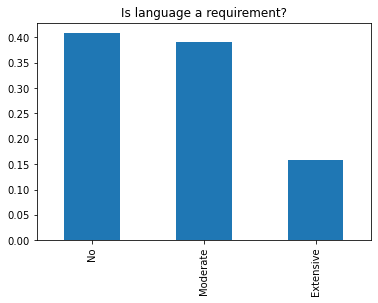

In [17]:
#Provide a pandas series of the counts for each Language dependence
language_vals = df['Language'].value_counts()

# Bar chart of the language dependency category

(language_vals/df.shape[0]).plot(kind="bar");
plt.title("Is language a requirement?");

In [18]:
# For each of the categorical variables create a column
# Ignore NaN columns (dummy_na=False) -> do not create an extra col for the nan values, they are set to 0
print('Language column has {} as unique values'.format(df['Language'].unique()))
language_dummy_df = pd.get_dummies(df['Language'], dummy_na=False).head()
language_dummy_df

Language column has ['Extensive' 'No' 'Moderate' nan] as unique values


,Extensive,Moderate,No
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0


In [19]:
# have a look at the different boardgame categories
df['Category'].head()

0    Thematic | Strategy 
1    Thematic | Strategy 
2               Strategy 
3               Strategy 
4    Thematic | Strategy 
Name: Category, dtype: object

In [20]:
df['Category'].unique()

array(['Thematic | Strategy ', 'Strategy ', 'Thematic',
       'War  | Strategy ', 'War  | Thematic', 'Strategy  | Family ',
       'Customizable | Thematic', 'Customizable', 'Abstract  | Family ',
       'Family ', 'Party ', 'War  | Customizable', 'War ',
       'Thematic | Party ', 'Abstract ', 'Customizable | Strategy ',
       'Thematic | Family ', 'Party  | Family ', 'Abstract  | Strategy ',
       nan, "Children's  | Family ", "Children's ", 'Strategy  | Party ',
       "Children's  | Party ", 'Abstract  | Customizable',
       'Thematic | Strategy  | Family ', 'Thematic | Party  | Family ',
       'War  | Thematic | Strategy ', 'Abstract  | Party ',
       "Children's  | Abstract "], dtype=object)

In [21]:
# get unique values
cat = []
for categories in df['Category']:
    for category in str(categories).split('|'):
        category = category.strip()
        if (category not in cat):
            cat.append(category)
            
print('There are {} categories: {}'.format(len(cat), cat))

There are 9 categories: ['Thematic', 'Strategy', 'War', 'Family', 'Customizable', 'Abstract', 'Party', 'nan', "Children's"]


In [22]:
df['Category'].head()

0    Thematic | Strategy 
1    Thematic | Strategy 
2               Strategy 
3               Strategy 
4    Thematic | Strategy 
Name: Category, dtype: object

In [23]:
category_dummy_df = df['Category'].str.replace(" ","").str.get_dummies("|").head()
category_dummy_df

,Abstract,Children's,Customizable,Family,Party,Strategy,Thematic,War
0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0


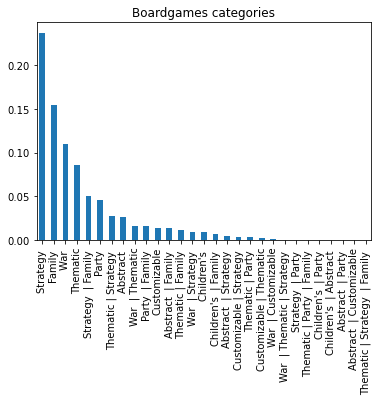

In [24]:
#Provide a pandas series of the counts for each Language dependence
language_vals = df['Category'].value_counts()

# Bar chart of the language dependency category

(language_vals/df.shape[0]).plot(kind="bar");
plt.title("Boardgames categories");

([<matplotlib.axis.XTick at 0x25f05cfb190>,
 [Text(0, 0, 'Thematic'),
  Text(1, 0, 'Strategy'),
  Text(2, 0, 'War'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Customizable'),
  Text(5, 0, 'Abstract'),
  Text(6, 0, 'Party'),
  Text(7, 0, 'nan'),
  Text(8, 0, "Children's")])

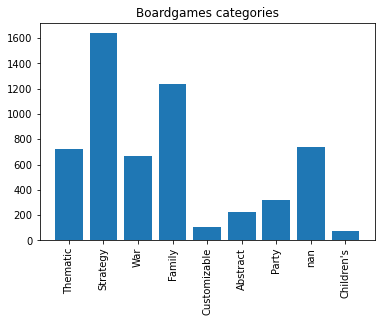

In [25]:
cat_all = []
for categories in df['Category']:
    for category in str(categories).split('|'):
        cat_all.append(category.strip())

from collections import Counter
        
#Provide a pandas series of the counts for each Language dependence
cat_vals = Counter(cat_all)

# Bar chart of the language dependency category
#(language_vals/df.shape[0]).plot(kind="bar");
plt.title("Boardgames categories");
plt.bar(range(len(cat_vals)), list(cat_vals.values()), align='center')
plt.xticks(range(len(cat_vals)), list(cat_vals.keys()), rotation='vertical')

In [26]:
# merge numerical columns
df_all_num = pd.concat([df, language_dummy_df, category_dummy_df], axis=1)
df_all_num.head()

,Board Game Rank,Title,Year,Description,Geek Rating,Avg Rating,Num Voters,Num Players Min,Num Players Max,Best Num Players Min,...,Moderate,No,Abstract,Children's,Customizable,Family,Party,Strategy,Thematic,War
0,1,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.552,8.79,43254,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.461,8.61,42367,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.391,8.67,20391,2.0,4.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.285,8.43,66708,1.0,5.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.254,8.69,13930,3.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
df_all_num.columns

Index(['Board Game Rank', 'Title', 'Year', 'Description', 'Geek Rating',
       'Avg Rating', 'Num Voters', 'Num Players Min', 'Num Players Max',
       'Best Num Players Min', 'Best Num Players Max', 'Playtime Min',
       'Playtime Max', 'Player Min Age', 'Language Dependence', 'Language',
       'Weight', 'Category', 'Designer', 'Year_Num', 'Extensive', 'Moderate',
       'No', 'Abstract', 'Children's', 'Customizable', 'Family', 'Party',
       'Strategy', 'Thematic', 'War'],
      dtype='object')

In [28]:
df_all_num.drop(labels=['Language', 'Language Dependence', 'Category'], axis=1, inplace=True)
df_all_num.columns

Index(['Board Game Rank', 'Title', 'Year', 'Description', 'Geek Rating',
       'Avg Rating', 'Num Voters', 'Num Players Min', 'Num Players Max',
       'Best Num Players Min', 'Best Num Players Max', 'Playtime Min',
       'Playtime Max', 'Player Min Age', 'Weight', 'Designer', 'Year_Num',
       'Extensive', 'Moderate', 'No', 'Abstract', 'Children's', 'Customizable',
       'Family', 'Party', 'Strategy', 'Thematic', 'War'],
      dtype='object')

In [29]:
# save cleaned data 
df_all_num.to_pickle("Boardgame//data//boardgame_data_clean.pkl")

### <a class="anchor" id="Data-Visualization">Part III : Data Visualization</a>
- put the language dependence col as a (needed, semi needed, not needed) -> put it as dummy
- get the type of planes (mysterious, cards...) -> put it as dummy
- check for nan's

In [30]:
print('The average rating given across all ratings', df['Avg Rating'].mean())
print('The max rating given across all ratings', df['Avg Rating'].max())
print('The min rating given across all ratings', df['Avg Rating'].min())

The average rating given across all ratings 7.089902020820596
The max rating given across all ratings 8.99
The min rating given across all ratings 5.81


In [31]:
print('The average rating given across all ratings', df['Geek Rating'].mean())
print('The max rating given across all ratings', df['Geek Rating'].max())
print('The min rating given across all ratings', df['Geek Rating'].min())

The average rating given across all ratings 6.1717223923249795
The max rating given across all ratings 8.552
The min rating given across all ratings 5.696000000000001


In [77]:
#### is it different the order between Geek and Average rating
df_corr = df[['Title', 'Avg Rating', 'Geek Rating', 'Num Voters']]
df_corr.insert(3, 'Diff_Avg_Geek_Rating', df_corr['Avg Rating'].values-df_corr['Geek Rating'].values)
df_corr.head()
#df_corr.sort_values(by='Avg Rating', ascending=False)[['Title', 'Avg Rating', 'Geek Rating', 'Num Voters']].head(10)

,Title,Avg Rating,Geek Rating,Diff_Avg_Geek_Rating,Num Voters
0,Gloomhaven,8.79,8.552,0.238,43254
1,Pandemic Legacy: Season 1,8.61,8.461,0.149,42367
2,Brass: Birmingham,8.67,8.391,0.279,20391
3,Terraforming Mars,8.43,8.285,0.145,66708
4,Twilight Imperium: Fourth Edition,8.69,8.254,0.436,13930


In [79]:
a = df_corr.sort_values(by='Avg Rating', ascending=True)[['Title', 'Avg Rating', 'Geek Rating', 'Diff_Avg_Geek_Rating', 'Num Voters']]
print(a.head(10))

                                                  Title  Avg Rating  \
4886                                   Apples to Apples        5.81   
4700                                         Pictionary        5.83   
3792                                           Unbroken        5.89   
4360                        Risk: The Lord of the Rings        5.90   
4453                             Cards Against Humanity        5.90   
4481                                           Munchkin        5.90   
3749                                              Kalah        5.92   
4774                                              Blink        5.93   
4276  Unlock!: Mystery Adventures – The Nautilus' Traps        5.95   
4666                                  Lord of the Fries        5.97   

      Geek Rating  Diff_Avg_Geek_Rating  Num Voters  
4886        5.697                 0.113       17654  
4700        5.710                 0.120        6986  
3792        5.789                 0.101        2007  
43

In [80]:
a = df_corr.sort_values(by='Avg Rating', ascending=False)[['Title', 'Avg Rating', 'Geek Rating', 'Diff_Avg_Geek_Rating', 'Num Voters']]
print(a.head(10))

                                          Title  Avg Rating  Geek Rating  \
2850                        Dungeon Universalis        8.99        5.918   
2646                         Arena: The Contest        8.97        5.960   
1973                                 Core Space        8.91        6.122   
3734  Roads to Gettysburg II: Lee Strikes North        8.89        5.795   
1911                       Aeon's End: Outcasts        8.86        6.140   
3930          World At War 85: Storming the Gap        8.85        5.774   
5                  Gloomhaven: Jaws of the Lion        8.83        8.237   
411                                   Kanban EV        8.80        6.974   
1881                        High Frontier 4 All        8.80        6.148   
0                                    Gloomhaven        8.79        8.552   

      Diff_Avg_Geek_Rating  Num Voters  
2850                 3.072         456  
2646                 3.010         609  
1973                 2.788         667  

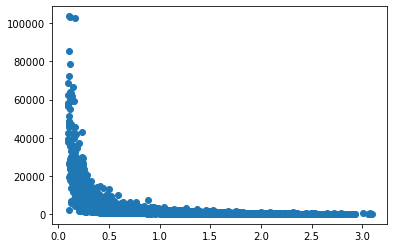

In [83]:
from matplotlib import pyplot
pyplot.scatter(df_corr['Diff_Avg_Geek_Rating'], df_corr['Num Voters'])
pyplot.show()

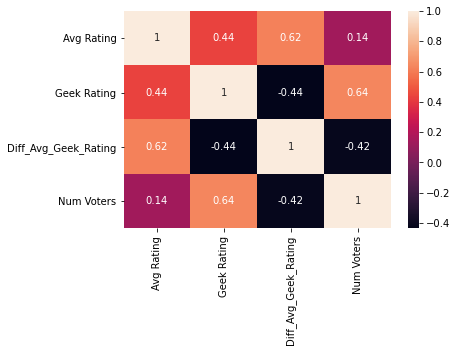

In [85]:
import seaborn as sn

corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

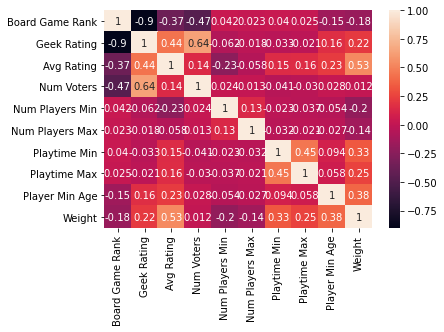

In [89]:
df2 = df.drop(labels=['Best Num Players Min', 'Best Num Players Max', 'Year_Num'], axis=1)
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# get distribution articles per user
articles_per_user = df.groupby('Geek Rating').count()['Title']
articles_per_user

In [10]:
round(articles_per_user.index,1)


TypeError: type Float64Index doesn't define __round__ method